# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [19]:
import pandas as pd

In [20]:
dados = pd.read_csv('emp_automovel.csv')

In [21]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [22]:
x = dados.drop('inadimplente', axis =1)
y = dados ['inadimplente']

### Criando o modelo - Árvore de Decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y) # Usar para ajustar aos dados
modelo.score(x, y) # Avaliação do modelo

1.0

In [25]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


### Separando em treino, validação e  teste

Como a acurácia é de 100%, indica que o modelo está acertando todas as classificações que realizou.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# test_size porcentagem para ficar no teste
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)

In [28]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [29]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [30]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8489678599425137


### Parâmetro max_depth

Como o desempenho está caindo, vamos usar o max_depth para ajustar a profundidade da árvore
Assim ele pode compreender melhor os dados e não decorar 

In [31]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9057573382109573


### Avaliando o Modelo

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
# Compara o modelo (y_previsto) com o real (y_val)
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10358   121]
 [  961    41]]


In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

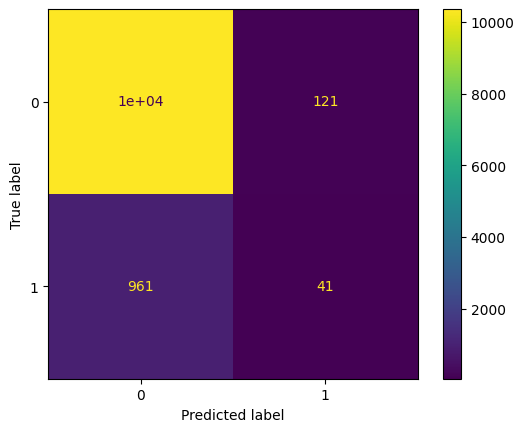

In [35]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();


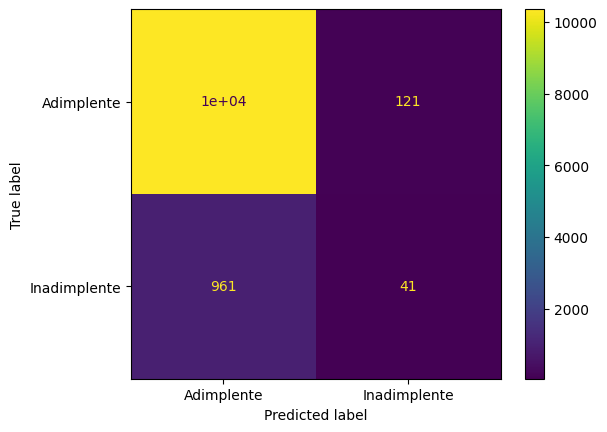

In [36]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

O modelo não está classificando bem o nosso problema

### Criando o modelo - Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
modelo = RandomForestClassifier(max_depth = 10)
                               
modelo.fit(x_treino, y_treino)

RandomForestClassifier(max_depth=10)

In [46]:
modelo.score(x, y)

0.9148755471352976

In [47]:
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9154761904761904
Acurácia de validação: 0.9130737740614929


In [48]:
# Compara o modelo (y_previsto) com o real (y_val)
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10479     0]
 [  998     4]]


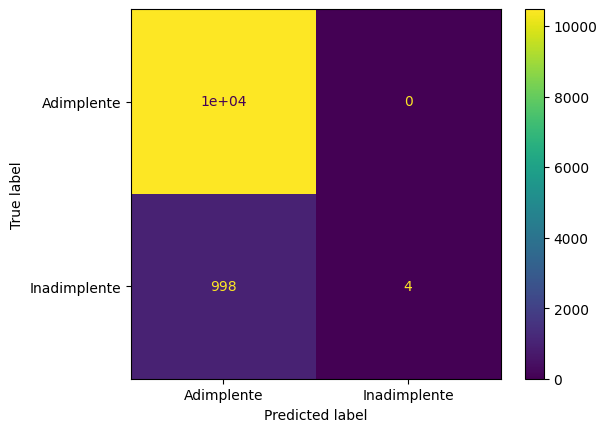

In [49]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

A partir dessa matriz, percebemos que apesar de uma acurácia maior, o modelo RandomForest não consegue identificar quase nenhum cliente inadimplente, indicando um resultado bem ruim em relação ao modelo de árvore de decisão.